# SCA on smart card
## CNT 2019.09

In [1]:
from scasc import scasc
from lecroysocket import LeCroyScope
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ip = '163.152.90.101'
timeout = 5

In [3]:
APDU_selectDF = [0x00, 0xA4, 0x04, 0x00, 0x0D, 0xF0, 0x4B, 0x45, 0x59, 0x50, 0x41, 0x49, 0x52, 0x20, 0x43, 0x4E, 0x54, 0x43]
APDU_getResponse_selectDF = [0x00, 0xC0, 0x00, 0x00, 0x0A]
APDU_CtrDrbgClearInternalState = [0x80, 0xBB, 0x00, 0x05, 0x00]
APDU_CtrDrbgInstantiate = [0x80, 0xAA, 0x00, 0x06, 0x04, 0x00, 0x00, 0x00, 0x00]
APDU_CtrDrbgReseed = [0x80, 0xAA, 0x00, 0x07, 0x04, 0x00, 0x00, 0x00, 0x00]
APDU_EcdhKeytokenGen = [0x80, 0xAA, 0x00, 0x1D, 0x06, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF]
APDU_readBinary_0x60 = [0x00, 0xB0, 0x00, 0x00, 0x60]
APDU_updateBinary_0x60 = [0x00, 0xD6, 0x00, 0x00, 0x60]
APDU_EcdhSesKeyGen = [0x80, 0xAA, 0x00, 0x1E, 0x0A, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF]
APDU_readBinary_0x40 = [0x00, 0xB0, 0x00, 0x00, 0x60]

In [4]:
sc = scasc()
sc.set_sc_reader()

sc readers:
 0 : Gemplus USB Smart Card Reader 0
Enter number of reader for connection : 0


In [6]:
sc.connect()

In [7]:
# ATR(Warm): 3B9137801F03576D
# ATR(Cold): 3B90B7801F07BF
sc.print_ATR()

ATR :  ['3B', '90', 'B7', '80', '1F', '07', 'BF']


### selectDF

In [8]:
data, sw1, sw2 = sc.send_APDU_lc(APDU_selectDF)

>> 00A404000D F04B45595041495220434E5443
>> 610A


In [9]:
data, sw1, sw2 = sc.send_APDU_le(APDU_getResponse_selectDF)

>> 00C000000A 
>> 6F088201388503015000 9000


In [10]:
data, sw1, sw2 = sc.send_APDU_lc(APDU_CtrDrbgInstantiate)

>> 80AA000604 00000000
>> 9000


In [11]:
data, sw1, sw2 = sc.send_APDU_lc(APDU_EcdhKeytokenGen)

>> 80AA001D06 FFFFFFFFFFFF
>> 9000


In [12]:
data, sw1, sw2 = sc.send_APDU_le(APDU_readBinary_0x60)

>> 00B0000060 
>> 79D05E83C720FD91EB48C2A9488DAA2923C8C401404DFBF02CDEFD0A11DBFE749C6EF05E5D2C23314E644A538DEA3BD0CF5BA45B795C816CA360DDAF5482E86D5D540C1FAB6D5415C4953C29CCBEE021E973D12EC9AB6C96AE494F5F6F9F5A25 9000


In [13]:
pubKeytokenX = data[0:32]
pubKeytokenY = data[32:64]
priKey = data[64:]

In [14]:
print(''.join(['%02X' % i for i in pubKeytokenX]))
print(''.join(['%02X' % i for i in pubKeytokenY]))
print(''.join(['%02X' % i for i in priKey]))

79D05E83C720FD91EB48C2A9488DAA2923C8C401404DFBF02CDEFD0A11DBFE74
9C6EF05E5D2C23314E644A538DEA3BD0CF5BA45B795C816CA360DDAF5482E86D
5D540C1FAB6D5415C4953C29CCBEE021E973D12EC9AB6C96AE494F5F6F9F5A25


In [15]:
data, sw1, sw2 = sc.send_APDU_lc(APDU_updateBinary_0x60 + pubKeytokenX + pubKeytokenY + priKey)

>> 00D6000060 79D05E83C720FD91EB48C2A9488DAA2923C8C401404DFBF02CDEFD0A11DBFE749C6EF05E5D2C23314E644A538DEA3BD0CF5BA45B795C816CA360DDAF5482E86D5D540C1FAB6D5415C4953C29CCBEE021E973D12EC9AB6C96AE494F5F6F9F5A25
>> 9000


In [16]:
data, sw1, sw2 = sc.send_APDU_lc(APDU_EcdhSesKeyGen)

>> 80AA001E0A FFFFFFFFFFFFFFFFFFFF
>> 9000


In [17]:
dso = LeCroyScope(ip, timeout=timeout)

In [18]:
dso.clear()
settings = dso.get_settings()
#print(settings)
print('settings')
for k in settings.keys():
    print(k, ':', settings[k])
channels = dso.get_channels()
print(channels)

settings
TIME_DIV : TDIV 50E-3 S
COMM_FORMAT : CFMT DEF9,BYTE,BIN
COMM_HEADER : CHDR SHORT
COMM_ORDER : CORD LO
TRIG_DELAY : TRDL -155E-3 S
TRIG_SELECT : TRSE EDGE,SR,C3,HT,OFF
TRIG_MODE : TRMD NORM
TRIG_PATTERN : TRPA STATE,NAND
SEQUENCE : SEQ OFF,10,5E+6 SAMPLE
C1:COUPLING : C1:CPL D1M
C2:COUPLING : C2:CPL D1M
C3:COUPLING : C3:CPL D1M
C4:COUPLING : C4:CPL D1M
C1:VOLT_DIV : C1:VDIV 5E-3 V
C2:VOLT_DIV : C2:VDIV 112E-3 V
C3:VOLT_DIV : C3:VDIV 2 V
C4:VOLT_DIV : C4:VDIV 200E-3 V
C1:OFFSET : C1:OFST 100E-6 V
C2:OFFSET : C2:OFST -446E-3 V
C3:OFFSET : C3:OFST 900E-3 V
C4:OFFSET : C4:OFST -5E-3 V
C1:TRIG_COUPLING : C1:TRCP DC
C2:TRIG_COUPLING : C2:TRCP DC
C3:TRIG_COUPLING : C3:TRCP DC
C4:TRIG_COUPLING : C4:TRCP AC
C1:TRIG_LEVEL : C1:TRLV -50E-6 V
C2:TRIG_LEVEL : C2:TRLV 0E-3 V
C3:TRIG_LEVEL : C3:TRLV 1.54 V
C4:TRIG_LEVEL : C4:TRLV 6E-3 V
C1:TRIG_SLOPE : C1:TRSL POS
C2:TRIG_SLOPE : C2:TRSL POS
C3:TRIG_SLOPE : C3:TRSL NEG
C4:TRIG_SLOPE : C4:TRSL POS
C1:TRACE : C1:TRA OFF
C2:TRACE : C2:TRA ON
C3

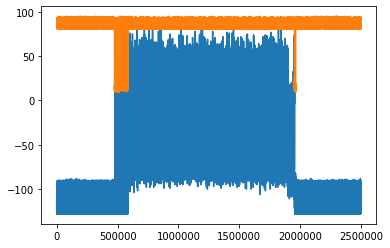

In [19]:
desc2, rw2 = dso.get_waveform(2)
desc3, rw3 = dso.get_waveform(3)

plt.plot(rw2)
plt.plot(rw3)
plt.show()

In [20]:
np.save('trace_1_tr', rw2)
np.save('trace_1_trig', rw3)

In [21]:
data, sw1, sw2 = sc.send_APDU_lc(APDU_EcdhSesKeyGen)

>> 80AA001E0A FFFFFFFFFFFFFFFFFFFF
>> 9000


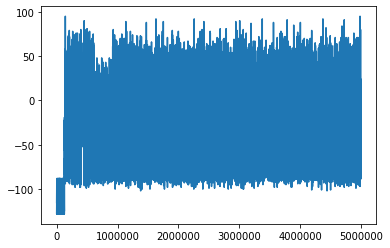

In [22]:
desc2, rw2 = dso.get_waveform(2)

plt.plot(rw2)
plt.show()

In [23]:
del dso
sc.disconnect()